https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://www.kaggle.com/code/purvasingh/time-series-analysis-with-arma-and-arima



In [3]:
import sys
!{sys.executable} -m pip install statsmodels

  Using cached statsmodels-0.13.5-cp39-cp39-win_amd64.whl (9.2 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9

[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('darkgrid')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller

### Generowanie danych z modelu ARMA(p, q)

In [2]:
p1 = 0.4
p2 = -0.5
q1 = 0.6
q2 = 0.3

ar_coef = np.array([1, -p1, -p2])
ma_coef = np.array([1, q1, q2])

arma_process = ArmaProcess(ar_coef, ma_coef).generate_sample(nsample=1000, scale=2)

Text(0.5, 0, 'numer obserwacji')

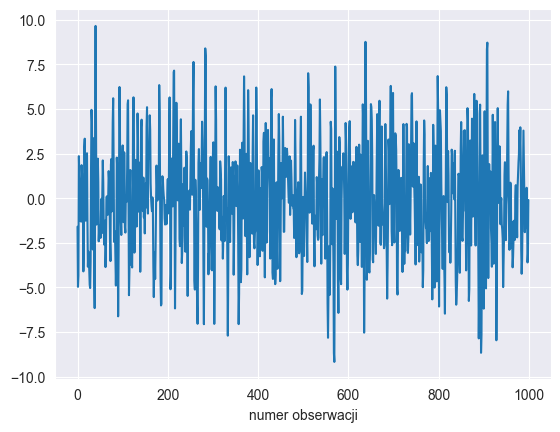

In [3]:
plt.plot(arma_process)
plt.xlabel('numer obserwacji')

In [4]:
# Testowanie stacjonarności
def adfuller_test(series, sig=0.05):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 
    stats   = round(res[0], 3) 

    if p_value <= sig:
        print(f"Statystyka testowa = {stats}, p-Value = {p_value} => Stationary. ")
    else:
        print(f"Statystyka testowa = {stats}, p-value = {p_value} => Non-stationary.")

In [5]:
adfuller_test(arma_process)

Statystyka testowa = -14.29, p-Value = 0.0 => Stationary. 


### Wizualizacja ACF i PACF

In [6]:
ar_coef = np.array([1, p1, p2])
ma_coef = np.array([1])
ma_process = ArmaProcess(ar_coef, ma_coef).generate_sample(nsample=1000)

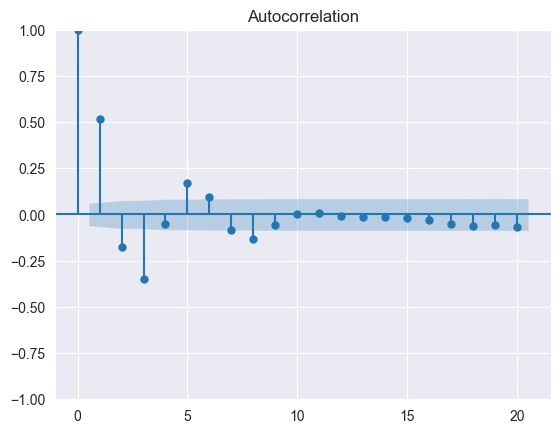

In [7]:
h = 20
plot_acf(arma_process, lags=h, adjusted=True)
plt.show()

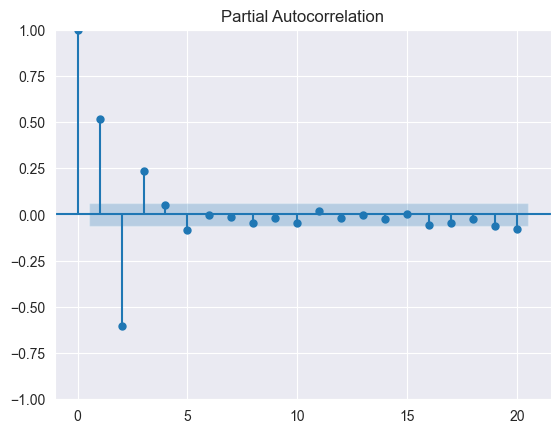

In [8]:
plot_pacf(arma_process, lags=h, method='ywm')
plt.show()

### PACF dla AR

C:\Users\User\anaconda3\envs\tf\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


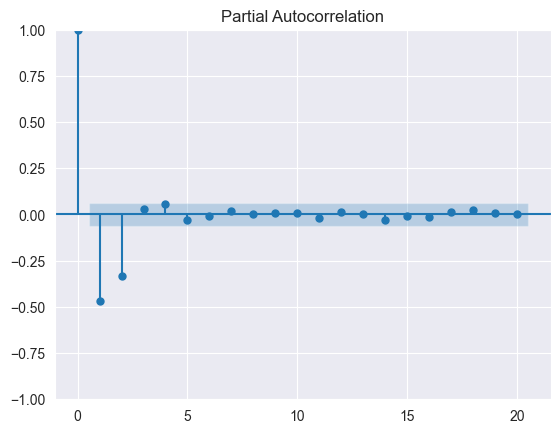

In [9]:
ar_coef0 = np.array([1, q1, q2])
ma_coef0 = np.array([1])
ar_process = ArmaProcess(ar_coef0, ma_coef0).generate_sample(nsample=1000)
plot_pacf(ar_process, lags=h)
plt.show()

### ACF dla MA

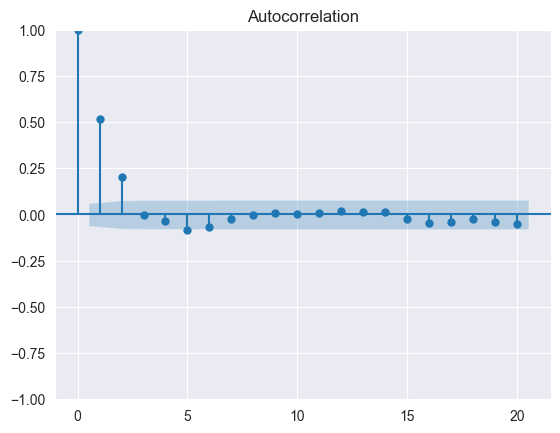

In [10]:
ar_coef1 = np.array([1])
ma_coef1 = np.array([1, q1, q2])
ma_process = ArmaProcess(ar_coef1, ma_coef1).generate_sample(nsample=1000)
plot_acf(ma_process, lags=h)
plt.show()

### Dopasowanie modelu, gdy p i q są znane

In [48]:
data[-10:]

[-11.359937256255694,
 -12.639465289278075,
 -5.92105449333706,
 -9.606641880033013,
 -9.043112423794529,
 -23.547123720114104,
 -38.422110594058914,
 -25.48364807590645,
 -18.70371865917891,
 -12.72969153690142]

In [39]:
?ARIMA.fit

In [40]:
p, q = 2, 2

model = ARIMA(data, order=(p, 0, q)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2557
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5507.634
Date:                Wed, 08 Feb 2023   AIC                          11027.268
Time:                        11:32:23   BIC                          11062.348
Sample:                             0   HQIC                         11039.989
                               - 2557                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0946      0.244     -0.388      0.698      -0.573       0.384
ar.L1          1.6118      0.044     36.528      0.000       1.525       1.698
ar.L2         -0.6232      0.038    -16.204      0.0

### Residua i parametry modelu

In [12]:
resid = model.resid
params = model.params

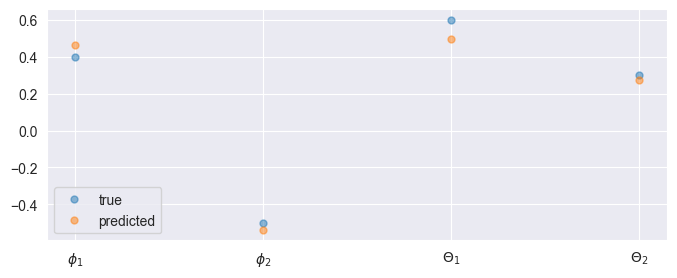

In [13]:
plt.figure(figsize=(8,3))
plt.plot([p1, p2, q1, q2], '.', markersize=10, alpha=0.5)
plt.plot(params[1:-1], '.', markersize=10, alpha=0.5)
plt.legend(['true', 'predicted'])
plt.xticks([0, 1, 2, 3], ['$\phi_1$', '$\phi_2$', '$\Theta_1$', '$\Theta_2$']);

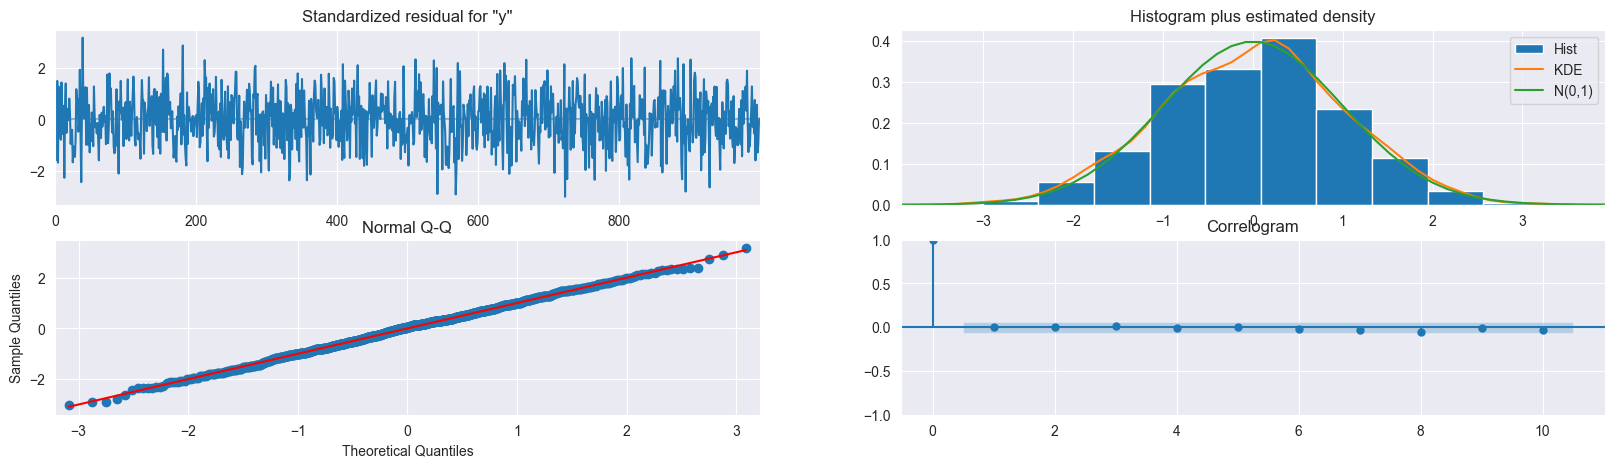

In [14]:
model.plot_diagnostics(0,figsize=(20,5))
plt.plot();

### Znajdownanie rzędu modelu (p, q) za pomocą kryteriów informacyjnych

In [27]:
import csv

In [28]:
data=[]

In [29]:
with open('w.csv', 'r', encoding='utf-8') as csvfile:
    csvreader = csv.DictReader(csvfile)

    for row in csvreader:
        data.append(float(row['X']))

In [32]:
df = pd.DataFrame()
ps = []
qs = []
BIC = []
AIC = []
HQIC = []

max_p = 10
max_q = 10

for p in range(0, max_p):
    for q in range(0, max_q):
        model = ARIMA(data, order=(p, 0, q))
        model_fit = model.fit()
        ps.append(p)
        qs.append(q)
        AIC.append(model_fit.aic)
        BIC.append(model_fit.bic)
        HQIC.append(model_fit.hqic)

df['p']    = ps
df['q']    = qs
df['AIC']  = AIC
df['BIC']  = BIC
df['HQIC'] = HQIC

C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: M

C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kacper\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: M

In [33]:
temp=df;

In [34]:
df.sort_values(by='AIC').head()

,p,q,AIC,BIC,HQIC
22,2,2,11027.268217,11062.347757,11039.989166
31,3,1,11027.610345,11062.689885,11040.331293
23,2,3,11028.293481,11069.219610,11043.134587
41,4,1,11028.295948,11069.222078,11043.137054
66,6,6,11028.558935,11110.411194,11058.241148


In [35]:
df.sort_values(by='BIC').head()

,p,q,AIC,BIC,HQIC
10,1,0,11039.636782,11057.176552,11045.997256
22,2,2,11027.268217,11062.347757,11039.989166
31,3,1,11027.610345,11062.689885,11040.331293
11,1,1,11040.673327,11064.059687,11049.153959
20,2,0,11040.799323,11064.185683,11049.279955


In [36]:
df.sort_values(by='HQIC').head()

,p,q,AIC,BIC,HQIC
22,2,2,11027.268217,11062.347757,11039.989166
31,3,1,11027.610345,11062.689885,11040.331293
23,2,3,11028.293481,11069.219610,11043.134587
41,4,1,11028.295948,11069.222078,11043.137054
32,3,2,11029.984098,11070.910227,11044.825204


In [37]:
df['p']

0     0
1     0
2     0
3     0
4     0
     ..
95    9
96    9
97    9
98    9
99    9
Name: p, Length: 100, dtype: int64

In [38]:
df.to_csv("pq.csv")